# We will compute the manifolds of the L1 and L2 Lagrange points in the Sun/Jupiter System

## We will be using the ThreeBodyProblem and DifferentialEquations packages

In [ ]:
using ThreeBodyProblem

In [ ]:
using DifferentialEquations

In [38]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


In [5]:
# We declare the primary and secondary bodies, along with the system
PRIM, SEC, SYS = sun_jupiter()

(Body(1.98847e30, 695700.0, 0.0, 0.0, "Sun"), Body(1.898187e27, 69911.0, 7.782799587829314e8, 3.74355659124e8, "Jupiter"), System(1.3271645321e11, 1.26690694941e8, 0.000953686364361088, 7.782799587829314e8, 695700.0, 69911.0, 3.74355659124e8, 7.782799587829314e8, 5.958055362400919e7, 13.06265067112951, "Sun/Jupiter"))

In [21]:
L1, L2 = computeLpts(SYS)

5-element Array{Array{Float64,1},1}:
 [0.9323700763087356, 0.0, 0.0]
 [1.0688260003760226, 0.0, 0.0]
 [-1.0003973692713148, 0.0, 0.0]
 [0.4990463136356389, 0.8660254037844386, 0.0]
 [0.4990463136356389, -0.8660254037844386, 0.0]

In [46]:
# Declare state vectors for L1 and L2 (with zero velocity)
rv1 = [L1; zeros(3)] # state at Lagrange point L1
rv2 = [L2; zeros(3)] # state at Lagrange point L2

6-element Array{Float64,1}:
 1.0688260003760226
 0.0
 0.0
 0.0
 0.0
 0.0

In [31]:
# Integrate trajectories for 10 periods
tspan = (0.,2π) # make sure to add decimal points so tspan contains floating point values, not integers
prob = ODEProblem(CR3BPdynamics!,rv1,tspan,SYS)
sol = solve(prob,reltol=1e-6)

retcode: Success
Interpolation: automatic order switching interpolation
t: 8-element Array{Float64,1}:
 0.0
 9.999999999999999e-5
 0.0010999999999999998
 0.011099999999999997
 0.11109999999999996
 1.1110999999999995
 6.123373227498348
 6.283185307179586
u: 8-element Array{Array{Float64,1},1}:
 [0.9323700763087356, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.9323700763087356, 1.8503717045202868e-28, 0.0, -5.551115123125784e-20, 5.551115107184246e-24, 0.0]
 [0.9323700763087356, 2.4628442294800438e-25, 0.0, -6.106226635438362e-19, 6.716846964981867e-22, 0.0]
 [0.9323700763087356, 2.530571984689412e-22, 0.0, -6.161737786669619e-18, 6.83928694284944e-20, 0.0]
 [0.9323700763087356, 2.532080135897918e-19, 0.0, -6.167288901792745e-17, 6.8276046761296306e-18, 0.0]
 [0.9323700763087351, 2.685692538049114e-16, 0.0, -1.445793305607487e-15, 7.56934551845564e-16, 0.0]
 [0.9323700762923073, 3.977234153818704e-11, 0.0, -1.9167763243790058e-10, 2.6524608469003643e-11, 0.0]
 [0.9323700762592909, 4.7297804558835066e-11

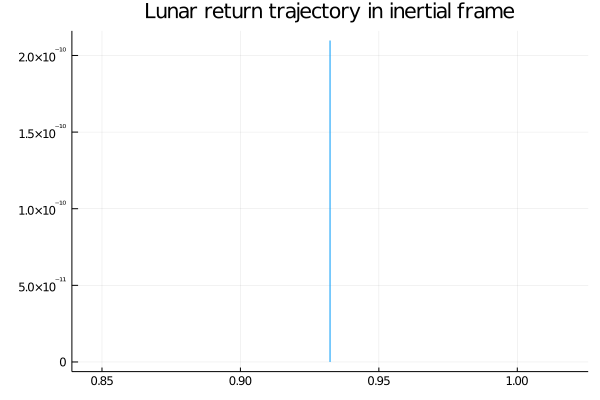

In [39]:
plot(sol,vars=(1,2),title="",label="")

In [47]:
computeC(rv2,SYS)

3.2800410198318497

In [57]:
invariantManifolds(SYS, rv1, 0,0,0)

LoadError: UndefVarError: tspan not defined

(Body(5.97237e24, 6371.0084, 1.495978976276167e8, 3.155814910224e7, "Earth"), Body(7.3457905697975825e22, 1737.5, 384400.0, 2.3606208e6, "Moon"), System(398613.89090999996, 4902.801, 0.012150181388514944, 384400.0, 6371.0084, 1737.5, 2.3606208e6, 384400.0, 375704.4690855444, 1.0231446033517255, "Earth/Moon"))

LoadError: MethodError: no method matching CR3BPdynamics!(::Array{ForwardDiff.Dual{ForwardDiff.Tag{typeof(CR3BPdynamics!),Float64},Float64,6},1})
Closest candidates are:
  CR3BPdynamics!(::Any, !Matched::Any, !Matched::Array, !Matched::Any) at /home/jared711/.julia/dev/ThreeBodyProblem/src/dynamics.jl:95
  CR3BPdynamics!(::Any, !Matched::Any, !Matched::System, !Matched::Any) at /home/jared711/.julia/dev/ThreeBodyProblem/src/dynamics.jl:68
  CR3BPdynamics!(::Any, !Matched::Any, !Matched::Any, !Matched::Any) at /home/jared711/.julia/dev/ThreeBodyProblem/src/dynamics.jl:57